# Time Series Forecasting for Energy Consumption: 

## Optimizing Resource Allocation in Smart Grid Systems

Name: Noel Stervin

DSML Student at Entri Elevate

Date: 13/05/2023

### Importing Libraries

In [90]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV 
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [54]:
df = pd.read_csv("I:\ENTRI\Final Project\energy_consumption_dataset -jithapnair.csv")

### Data Exploring

In [55]:
df

,Date/Time,Temperature,Humidity,Day of Week,Time of Day,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption
0,2020-01-01 00:00:00,17.440675,73.264794,Wednesday,00:00,Fall,1,4437.698981,1799.303909,0.123206,12.228164,0.059692,169.032542,1469.402213,1367.517344
1,2020-01-01 01:00:00,25.759468,29.280938,Wednesday,01:00,Spring,1,2240.248004,2109.917892,0.096013,14.950992,19.246831,705.612502,169.805891,4078.500517
2,2020-01-01 02:00:00,20.138169,55.772252,Wednesday,02:00,Winter,0,1443.646518,2814.549791,0.161145,11.384525,10.978002,268.142230,1988.009121,4614.282050
3,2020-01-01 03:00:00,17.244159,87.520015,Wednesday,03:00,Summer,0,2325.184898,4680.163261,0.272355,10.109367,2.472984,262.186871,174.970181,3578.730578
4,2020-01-01 04:00:00,11.182740,26.383045,Wednesday,04:00,Fall,0,1552.041035,4080.463060,0.163503,9.012346,4.509169,486.224719,1004.081112,4194.210499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,2024-12-30 20:00:00,16.224974,45.931201,Monday,20:00,Summer,1,3299.135828,3069.518353,0.135656,12.340619,3.685611,666.593466,1538.228889,1087.122191
43821,2024-12-30 21:00:00,-2.638805,64.145829,Monday,21:00,Fall,0,1435.657343,1185.862843,0.238843,11.169718,6.561095,772.779958,1641.830840,4277.546615
43822,2024-12-30 22:00:00,23.730335,70.776912,Monday,22:00,Spring,0,3441.205510,3003.358652,0.209155,15.948723,7.276048,567.131701,1800.057131,2915.121073
43823,2024-12-30 23:00:00,12.921507,40.567168,Monday,23:00,Spring,0,1200.156417,4850.113450,0.286449,14.597026,7.211708,27.142705,926.475955,2944.563179


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43825 entries, 0 to 43824
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date/Time                           43825 non-null  object 
 1   Temperature                         43825 non-null  float64
 2   Humidity                            43825 non-null  float64
 3   Day of Week                         43825 non-null  object 
 4   Time of Day                         43825 non-null  object 
 5   Season                              43825 non-null  object 
 6   Holiday Indicator                   43825 non-null  int64  
 7   Previous Day's Energy Consumption   43825 non-null  float64
 8   Previous Week's Energy Consumption  43825 non-null  float64
 9   Energy Price                        43825 non-null  float64
 10  Daylight Hours                      43825 non-null  float64
 11  Wind Speed                          43825

In [57]:
df.columns

Index(['Date/Time', 'Temperature', 'Humidity', 'Day of Week', 'Time of Day',
       'Season', 'Holiday Indicator', 'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption'],
      dtype='object')

In [58]:
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
             Date/Time  Temperature   Humidity Day of Week Time of Day  \
0  2020-01-01 00:00:00    17.440675  73.264794   Wednesday       00:00   
1  2020-01-01 01:00:00    25.759468  29.280938   Wednesday       01:00   
2  2020-01-01 02:00:00    20.138169  55.772252   Wednesday       02:00   
3  2020-01-01 03:00:00    17.244159  87.520015   Wednesday       03:00   
4  2020-01-01 04:00:00    11.182740  26.383045   Wednesday       04:00   

   Season  Holiday Indicator  Previous Day's Energy Consumption  \
0    Fall                  1                        4437.698981   
1  Spring                  1                        2240.248004   
2  Winter                  0                        1443.646518   
3  Summer                  0                        2325.184898   
4    Fall                  0                        1552.041035   

   Previous Week's Energy Consumption  Energy Price  Daylight Hours  \
0                         1799.303909      0.123

In [59]:
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
Date/Time                              object
Temperature                           float64
Humidity                              float64
Day of Week                            object
Time of Day                            object
Season                                 object
Holiday Indicator                       int64
Previous Day's Energy Consumption     float64
Previous Week's Energy Consumption    float64
Energy Price                          float64
Daylight Hours                        float64
Wind Speed                            float64
Solar Irradiance                      float64
Population Density                    float64
Energy Consumption                    float64
dtype: object


In [60]:
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,Temperature,Humidity,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption
count,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000
mean,14.890011,55.001300,0.050633,3004.992815,3007.367131,0.174295,11.979391,9.968398,498.817391,1023.628163,3008.245695
std,14.476096,20.201569,0.219250,1150.099329,1158.462428,0.072037,2.310568,5.787710,288.424913,562.421323,1153.422006
min,-9.996378,20.000232,0.000000,1000.251530,1000.054170,0.050005,8.000024,0.000416,0.035109,50.011787,1000.033142
25%,2.318324,37.402173,0.000000,2013.068826,1995.962354,0.111768,9.968250,4.956682,248.935625,537.001881,2012.751540
50%,14.886739,54.965030,0.000000,3013.983220,3012.369499,0.174438,11.971855,9.933075,499.333064,1021.824580,3017.398352
75%,27.454544,72.478944,0.000000,4004.036776,4014.428878,0.236505,13.978746,14.962423,748.138519,1511.251895,4008.610275
max,39.998898,89.997775,1.000000,4999.898186,4999.996048,0.299999,15.999874,19.999240,999.927153,1999.989309,4999.915113


### Data Pre-processing

In [61]:
# Handling missing values
print("Missing values summary:")
print(df.isnull().sum())

Missing values summary:
Date/Time                             0
Temperature                           0
Humidity                              0
Day of Week                           0
Time of Day                           0
Season                                0
Holiday Indicator                     0
Previous Day's Energy Consumption     0
Previous Week's Energy Consumption    0
Energy Price                          0
Daylight Hours                        0
Wind Speed                            0
Solar Irradiance                      0
Population Density                    0
Energy Consumption                    0
dtype: int64


##### No missing or null values.

In [62]:
# Dealing with Duplicate Data
df[df.duplicated()]

,Date/Time,Temperature,Humidity,Day of Week,Time of Day,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption


##### No duplicate values.

<Axes: xlabel='Energy Consumption', ylabel='Density'>

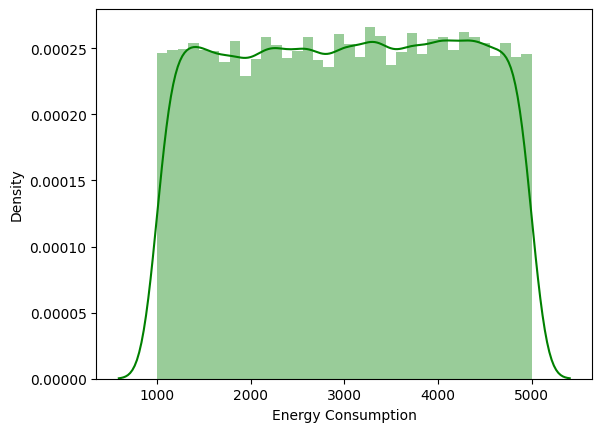

In [63]:
# Outlier Detection and Treatment using Inter Quartile Range (IQR) Method

#To view the distplot
sns.distplot(df['Energy Consumption'],color='green')

<Axes: ylabel='Energy Consumption'>

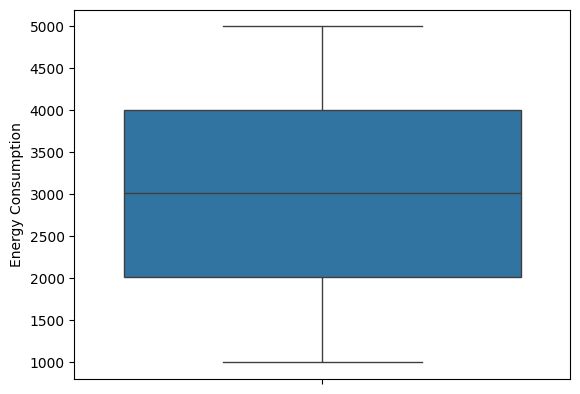

In [64]:
# To view the Outliers on Boxplot
sns.boxplot(df['Energy Consumption'])

In [65]:
# Calculate the Quartiles (Q1&Q2)
Q1 = df['Energy Consumption'].quantile(0.25)
Q3 = df['Energy Consumption'].quantile(0.75)
print('Q1;',Q1)
print('Q3;',Q3)

Q1; 2012.7515403697453
Q3; 4008.6102747155846


In [66]:
# Calculate the IQR
IQR=Q3-Q1
print('IQR=',IQR)

IQR= 1995.8587343458394


In [67]:
# Define Lower Whisker and Upper Whisker
Lower_whisker=Q1-(1.5 * IQR)
Upper_Whisker=Q3+(1.5 * IQR)
print('Lower_Whisker:',Lower_whisker)
print('Upper_Whisker:',Upper_Whisker)

Lower_Whisker: -981.0365611490138
Upper_Whisker: 7002.398376234343


In [68]:
# Finding the Outliers
df_iqr = df[(df['Energy Consumption'] < -981.0365611490138) | (df['Energy Consumption'] > 7002.398376234343)]
df_iqr

,Date/Time,Temperature,Humidity,Day of Week,Time of Day,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption


In [69]:
df_Del_iqr=df[(df['Energy Consumption'] < -981.0365611490138) & (df['Energy Consumption'] > 7002.398376234343)]
df_Del_iqr

,Date/Time,Temperature,Humidity,Day of Week,Time of Day,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption


In [70]:
print('Outliers:',len(df)-len(df_Del_iqr))
print('Before Outliers:',len(df))
print('After Outliers:',len(df_Del_iqr))

Outliers: 43825
Before Outliers: 43825
After Outliers: 0


Text(0.5, 1.0, 'Outliers')

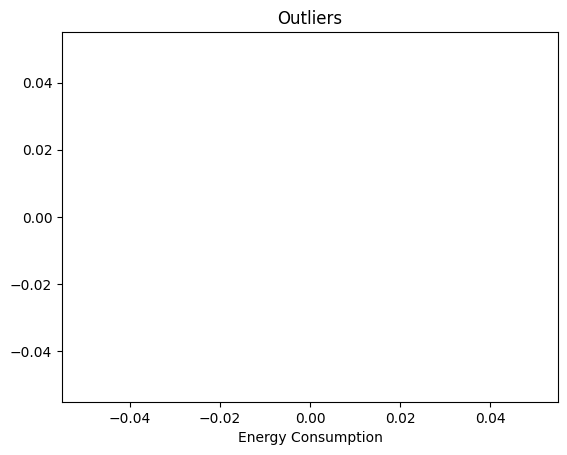

In [71]:
sns.distplot(df_Del_iqr['Energy Consumption'],color='green')
plt.title('Outliers')

##### Using IQR method, we have detected and removed outliers.

In [72]:
# Feature Scaling/Normalization
numerical_features = ["Temperature", "Humidity", "Daylight Hours", "Wind Speed", "Solar Irradiance", 
                      "Previous Day's Energy Consumption", "Previous Week's Energy Consumption", "Energy Price", "Population Density"]


In [73]:
scaler = StandardScaler()

In [74]:
scaler.fit(df[numerical_features])

StandardScaler()

In [75]:
data_scaled = pd.DataFrame(scaler.transform(df[numerical_features]), columns=numerical_features)


In [76]:
data_scaled = pd.concat([data_scaled, df.drop(numerical_features, axis=1)], axis=1)

### Exploratory Data Analysis (EDA)

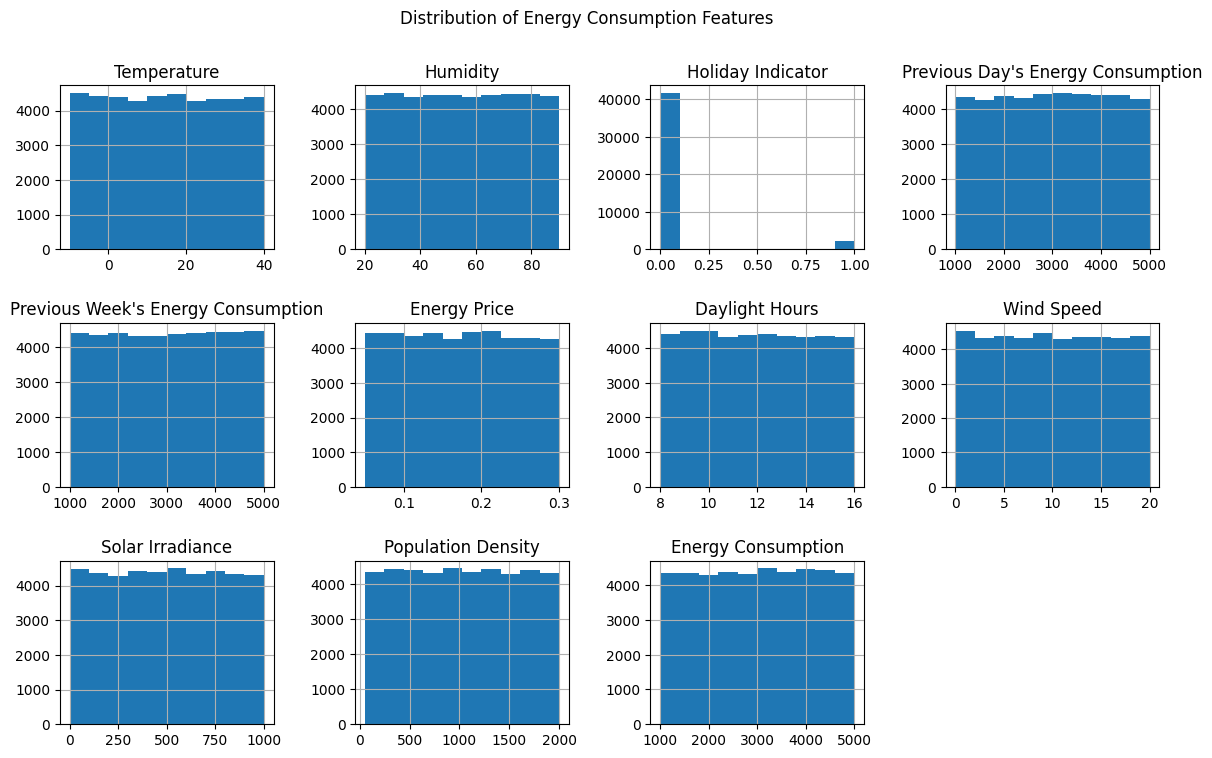

In [77]:
# Distribution Plots
df.hist(figsize=(12, 10), layout=(4, 4))
plt.suptitle('Distribution of Energy Consumption Features')
plt.tight_layout(pad=2)
plt.show()

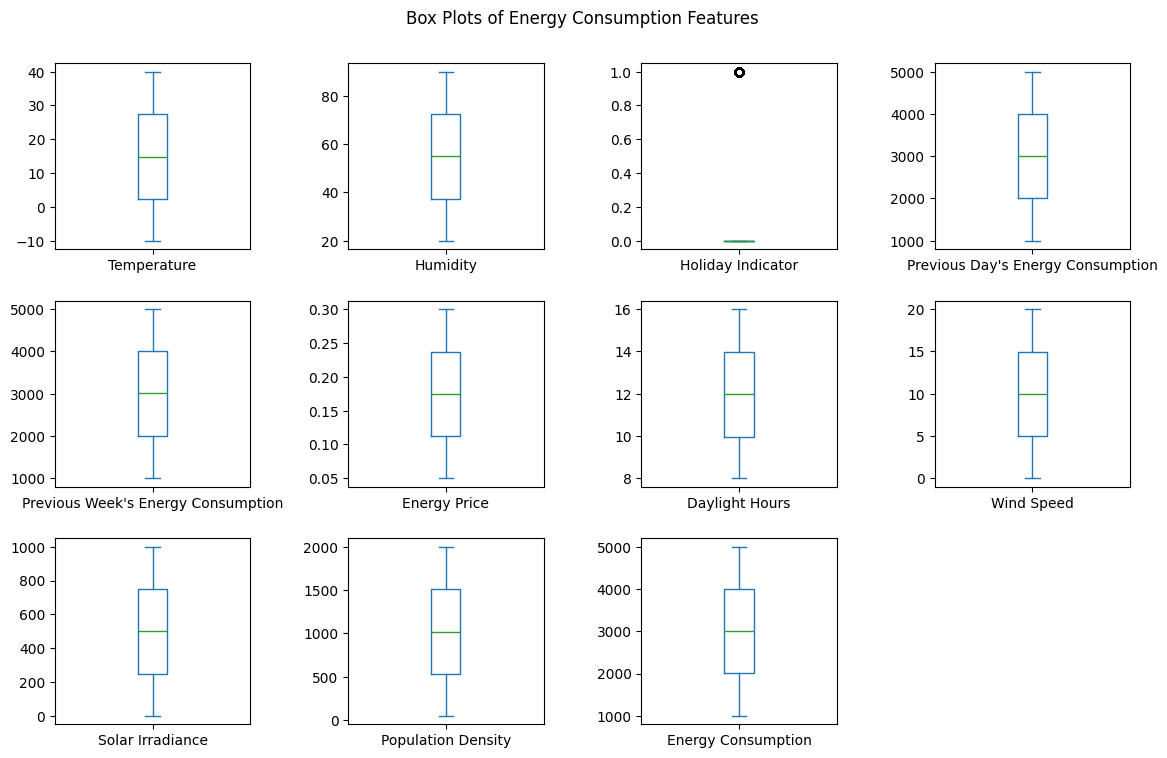

In [78]:
# Box plots for numerical features
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 10))
plt.suptitle('Box Plots of Energy Consumption Features')
plt.tight_layout(pad=2)
plt.show()

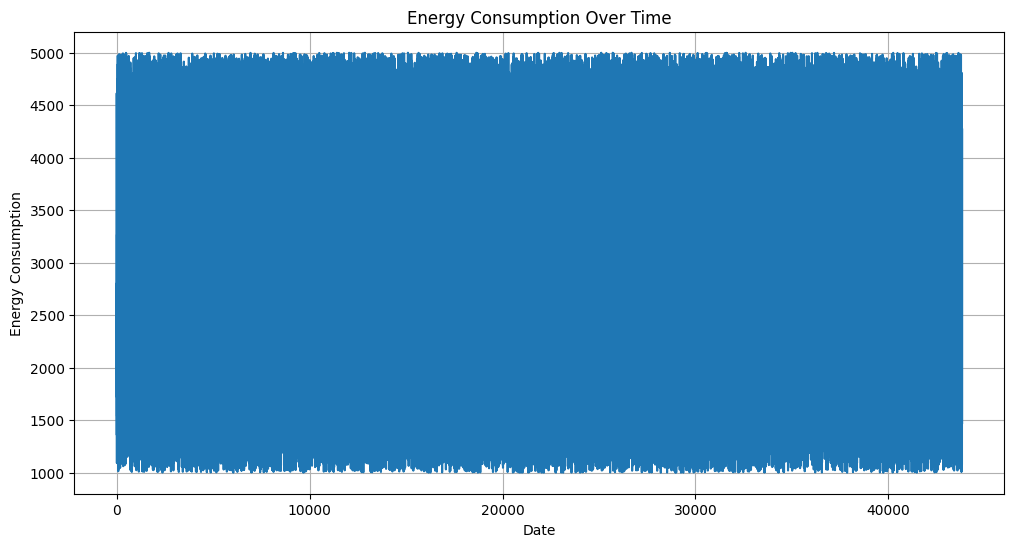

In [79]:
# Time Series Plot for Energy Consumption
df['Energy Consumption'].plot(figsize=(12, 6))
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

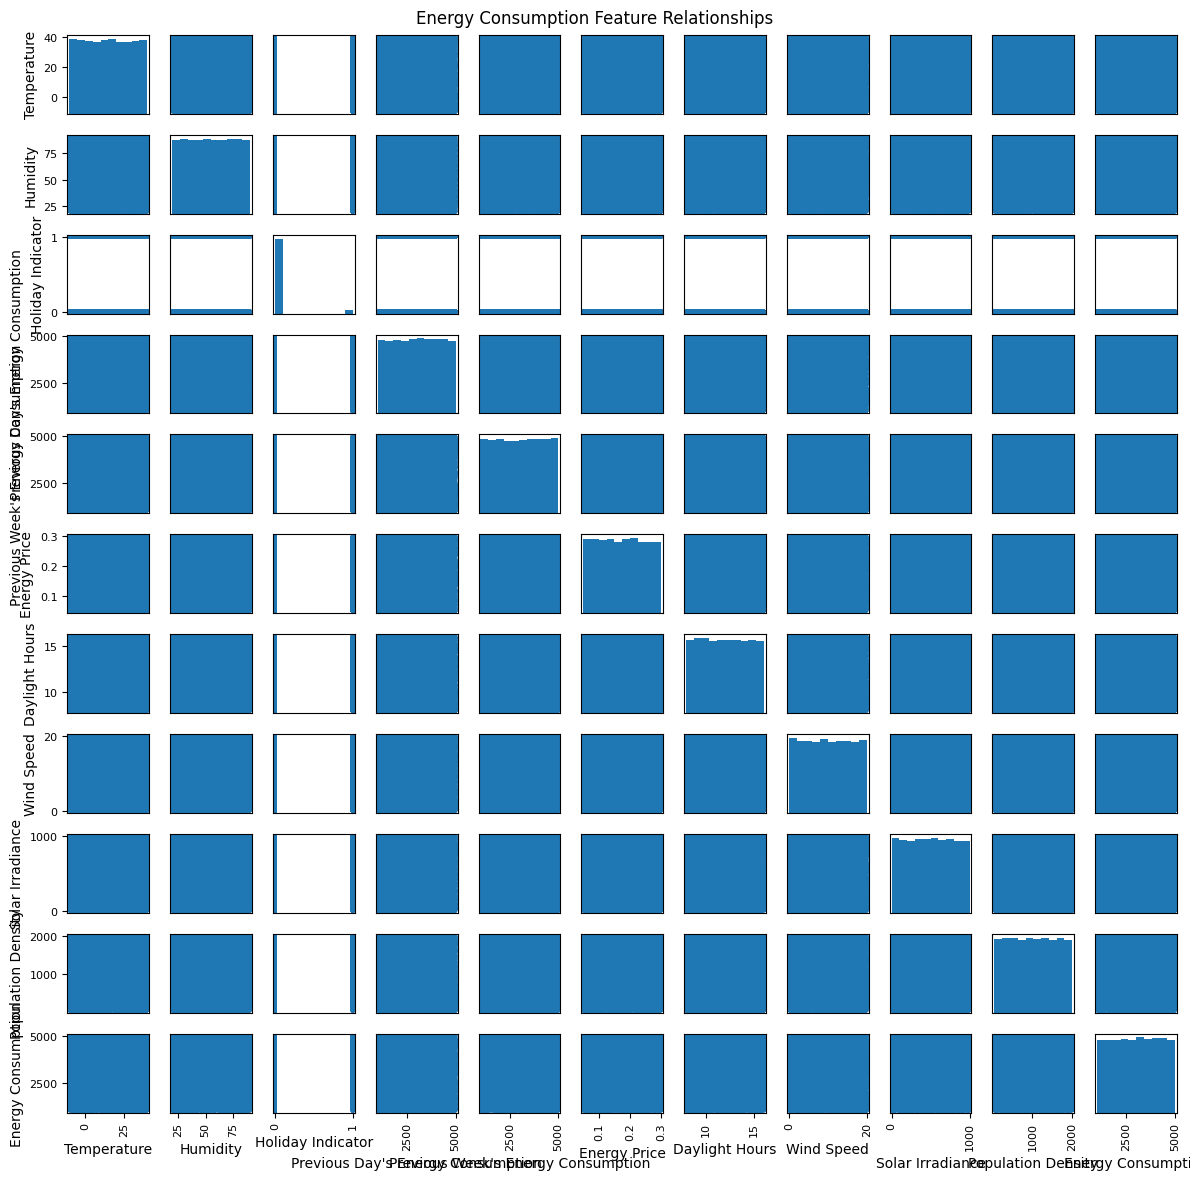

In [80]:
# Pairwise Scatter Matrix
scatter_matrix(df, alpha=0.8, figsize=(12, 12), diagonal='hist')
plt.suptitle('Energy Consumption Feature Relationships')
plt.tight_layout()
plt.show()

In [81]:
# The above visualisations provide insights into the distribution of features, relationships between variables, and potential trends in energy consumption over time. 

### Feature Engineering

In [82]:
# Feature Creation
df['Rolling Mean_7d'] = df['Energy Consumption'].rolling(window=7).mean()

In [83]:
# Feature Transformation
df['Log_Energy_Consumption'] = np.log1p(df['Energy Consumption'])

In [84]:
# Encoding Categorical Variables
categorical_features = ["Day of Week", "Season", "Holiday Indicator"]
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features:
  df[feature] = label_encoder.fit_transform(df[feature])

### Data Splitting

In [85]:
split_ratio = 0.8
train_size = int(len(df) * split_ratio)
train_data, test_data = df[:train_size], df[train_size:]

### Model Selection

In [86]:
def evaluate_model(model, data):
  predictions = model.predict(data)
  rmse = mean_squared_error(data['Energy Consumption'], predictions, squared=False)
  print(f"{model.__class__.__name__} RMSE: {rmse:.2f}")


In [93]:
# Time Series Models

# ARIMA
model = ARIMA(train_data['Energy Consumption'], order=(1, 1, 1))
model_fit = model.fit()
evaluate_model(model_fit, test_data)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
# Machine Learning Models

# Gradient Boosting Regressor
GradientBoosting = GradientBoostingRegressor(random_state=42)
GradientBoosting.fit(x_train, y_train)
print("Gradient Boosting Regressor:")

Gradient_PredictedTest=GradientBoosting.predict(x_test)
Gradient_PredictedTest

mae=mean_absolute_error(y_test, Gradient_PredictedTest)
mse=mean_squared_error(y_test, Gradient_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Gradient_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

### Model Training

In [ ]:
# Hyperparameter optimization using Grid Search CV

param_grid = {
    'order': [(1, 1, 1), (2, 1, 1), (1, 2, 1)],
    'seasonal_order': [(1, 1, 1, 7), (1, 1, 1, 14)]
}


model = SARIMA(train_data['Energy Consumption'])
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(train_data)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

### Model Evaluation

In [ ]:
def evaluate_model(model, data, metrics):

  predictions = model.predict(data)
  results = {}
  for metric in metrics:
    metric_name = metric.__name__  
    results[metric_name] = metric(df['Energy Consumption'], predictions)
  return results
    
models = []
metrics = [mean_squared_error, mean_absolute_error, r2_score]

model_results = {}
for model in models:
  model_name = model.__class__.__name__ 
  model_results[model_name] = evaluate_model(model, test_data.copy(), metrics)


### Conclusion

##### This project explores various time series forecasting models for predicting energy consumption. Techniques implemented are data splitting, model training, hyperparameter optimization using GridSearchCV, and evaluation using metrics like MAE, MSE, RMSE, and R^2. They can help discover valuable insights in this dataset. By analyzing evaluation metrics, we can select the most suitable model for forecasting future energy consumption based on our specific requirements.

##### Future investigation could involve incorporating additional features or exploring advanced forecasting techniques.

### References

##### DSML Course from Entri Elevate

##### ChatGPT

##### Google